# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Número de saudáveis
num_saudaveis = df[df['flag_doente'] == 0]['sex'].value_counts()[0]

# Número de doentes
num_doentes = df[df['flag_doente'] == 1]['sex'].value_counts()[0]

# Total
total = df['sex'].value_counts().sum()

# Quantidade média de doentes
media_doentes = num_doentes / total

# Odds
odds = num_doentes / num_saudaveis

# Odds ratio (com o total como referência)
odds_ratio = odds / ((total - num_doentes) / (total - num_saudaveis))

# Logito (LOG(Odds))
logito = np.log(odds)


woe = np.log(odds_ratio)

# Imprimir as estatísticas
print("Número de saudáveis:", num_saudaveis)
print("Número de doentes:", num_doentes)
print("Total:", total)
print("Quantidade média de doentes:", media_doentes)
print("Odds:", odds)
print("Odds ratio (com o total como referência):", odds_ratio)
print("Logito (LOG(Odds)):", logito)
print("Weight of Evidence (WOE) (com o total como referência):", woe)


Número de saudáveis: 72
Número de doentes: 25
Total: 303
Quantidade média de doentes: 0.08250825082508251
Odds: 0.3472222222222222
Odds ratio (com o total como referência): 0.28851918465227816
Logito (LOG(Odds)): -1.0577902941478545
Weight of Evidence (WOE) (com o total como referência): -1.2429936973166982


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [5]:
df['age_group'] = pd.cut(df['age'], bins=5, labels=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'])


In [6]:
# Número de saudáveis em cada grupo
num_saudaveis = df[df['flag_doente'] == 0]['age_group'].value_counts()

# Número de doentes em cada grupo
num_doentes = df[df['flag_doente'] == 1]['age_group'].value_counts()

# Total em cada grupo
total = df['age_group'].value_counts()

# Quantidade média de doentes em cada grupo
media_doentes = num_doentes / total

# Odds em cada grupo
odds = num_doentes / num_saudaveis

# Odds ratio (com o total como referência) em cada grupo
odds_ratio = odds / ((total - num_doentes) / (total - num_saudaveis))

# Logito (LOG(Odds)) em cada grupo
logito = np.log(odds)

# Weight of Evidence (WOE) (com o total como referência) em cada grupo
woe = np.log(odds_ratio)

# Valor médio da variável age em cada grupo
valor_medio = df.groupby('age_group')['age'].mean()

# Imprimir as estatísticas
print("Número de saudáveis em cada grupo:\n", num_saudaveis)
print("\nNúmero de doentes em cada grupo:\n", num_doentes)
print("\nTotal em cada grupo:\n", total)
print("\nQuantidade média de doentes em cada grupo:\n", media_doentes)
print("\nOdds em cada grupo:\n", odds)
print("\nOdds ratio (com o total como referência) em cada grupo:\n", odds_ratio)
print("\nLogito (LOG(Odds)) em cada grupo:\n", logito)
print("\nWeight of Evidence (WOE) (com o total como referência) em cada grupo:\n", woe)
print("\nValor médio da variável age em cada grupo:\n", valor_medio)


Número de saudáveis em cada grupo:
 Grupo 3    56
Grupo 2    50
Grupo 4    40
Grupo 5    10
Grupo 1     8
Name: age_group, dtype: int64

Número de doentes em cada grupo:
 Grupo 4    67
Grupo 3    41
Grupo 2    21
Grupo 5     7
Grupo 1     3
Name: age_group, dtype: int64

Total em cada grupo:
 Grupo 4    107
Grupo 3     97
Grupo 2     71
Grupo 5     17
Grupo 1     11
Name: age_group, dtype: int64

Quantidade média de doentes em cada grupo:
 Grupo 4    0.626168
Grupo 3    0.422680
Grupo 2    0.295775
Grupo 5    0.411765
Grupo 1    0.272727
Name: age_group, dtype: float64

Odds em cada grupo:
 Grupo 1    0.375000
Grupo 2    0.420000
Grupo 3    0.732143
Grupo 4    1.675000
Grupo 5    0.700000
Name: age_group, dtype: float64

Odds ratio (com o total como referência) em cada grupo:
 Grupo 1    0.140625
Grupo 2    0.176400
Grupo 3    0.536033
Grupo 4    2.805625
Grupo 5    0.490000
Name: age_group, dtype: float64

Logito (LOG(Odds)) em cada grupo:
 Grupo 1   -0.980829
Grupo 2   -0.867501
Grup

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

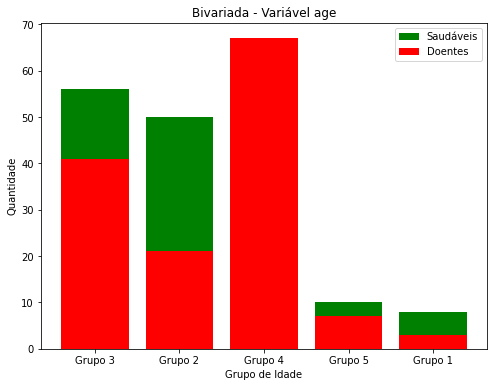

In [7]:
plt.figure(figsize=(8, 6))
plt.title("Bivariada - Variável age")
plt.xlabel("Grupo de Idade")
plt.ylabel("Quantidade")

# Plotando as barras para o número de saudáveis
plt.bar(num_saudaveis.index, num_saudaveis, label="Saudáveis", color='green')

# Plotando as barras para o número de doentes
plt.bar(num_doentes.index, num_doentes, label="Doentes", color='red')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()
